# STAT 301 - Final Report
- Faraz Hosseinian-Tehrani (57277188)
- Tarvin Kaur Arora (64493513)
- Jiaqi Teng (48426019)
- Kevin Cheng (58605734)
------


### 1. Introduction
Main author: Grace

The [Heart Disease dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) is a well-known collection of clinical and diagnostic data used to identify factors linked to heart disease. Originally from the UCI Machine Learning Repository, it includes 303 patient records gathered from Cleveland (USA), Hungary, Switzerland, and Long Beach (USA), covering demographics, clinical metrics, and test results. While the dataset contains up to 76 attributes, most studies focus on a core subset of 14 key features. These 14 variables have been widely adopted due to their completeness and strong relevance to cardiovascular outcomes.

This project will concentrate on the Cleveland subset of the data, as it is extensively studied and free of missing values within the chosen attributes. By following established standards, comparisons with previous research are facilitated. The analysis will be conducted using R, leveraging its robust libraries and visualization tools to clean the data, build predictive models, and interpret results.

### 2. Question

**Question of Interest**: How do lifestyle-related factors including type of chest pain, resting blood pressure, cholesterol level, fasting blood sugar, resting ECG results, and maximum heart rate help predict the presence of heart disease within men and women?

### 3. Exploratory Data Analysis and Visualization
Main developer: Tarvin

In [1]:
install.packages("GGally")
install.packages("corrplot")
install.packages("cowplot")
install.packages("caret")
library(cowplot)
library(ggplot2)
library(GGally)
library(dplyr)
library(corrplot)
library(tidyr)
library(caret)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


corrplot 0.95 loaded

Loading required package: lattice



In [2]:
heart_data <- read.csv("heart.csv")

As per our question of interest, we decided to streamline our dataset to include the variables of interest: `sex`, `cp`, `trestbps`, `chol`, `fbs`, `restecg`, and `thalach`. Next, we divided our data frame into two subsets, one which only contained data for `men` and the other which contained data only for `women`. The choice of making subsets of the dataframes was to build two sex-based models since from `Tarvin's` method and computation on the individual part it was clear that model performance depended on `sex` for this specific dataset. 

In [3]:
heart_clean <- heart_data %>%
    select(target, sex, cp, trestbps, chol, fbs, restecg, thalach)

head(heart_clean)

,target,sex,cp,trestbps,chol,fbs,restecg,thalach
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,1,0,125,212,0,1,168
2,0,1,0,140,203,1,0,155
3,0,1,0,145,174,0,1,125
4,0,1,0,148,203,0,1,161
5,0,0,0,138,294,1,1,106
6,1,0,0,100,248,0,0,122


In [4]:
# Main developer: Tarvin
# Contributors: Faraz
women_data <- subset(heart_clean, sex == 0) %>% select(-sex)
men_data <- subset(heart_clean, sex == 1) %>% select(-sex)

head(women_data)
head(men_data)

,target,cp,trestbps,chol,fbs,restecg,thalach
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
5,0,0,138,294,1,1,106
6,1,0,100,248,0,0,122
11,1,0,112,149,0,1,125
12,0,0,132,341,1,0,136
13,1,1,118,210,0,1,192
16,1,1,118,210,0,1,192


,target,cp,trestbps,chol,fbs,restecg,thalach
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,125,212,0,1,168
2,0,0,140,203,1,0,155
3,0,0,145,174,0,1,125
4,0,0,148,203,0,1,161
7,0,0,114,318,0,2,140
8,0,0,160,289,0,0,145


Our first visualisation choice was a **correlation matrix** (each for men = GreenBlue palette and women = RedOrangeYellow palette) to understand the relationships between numerical variables in our dataset.

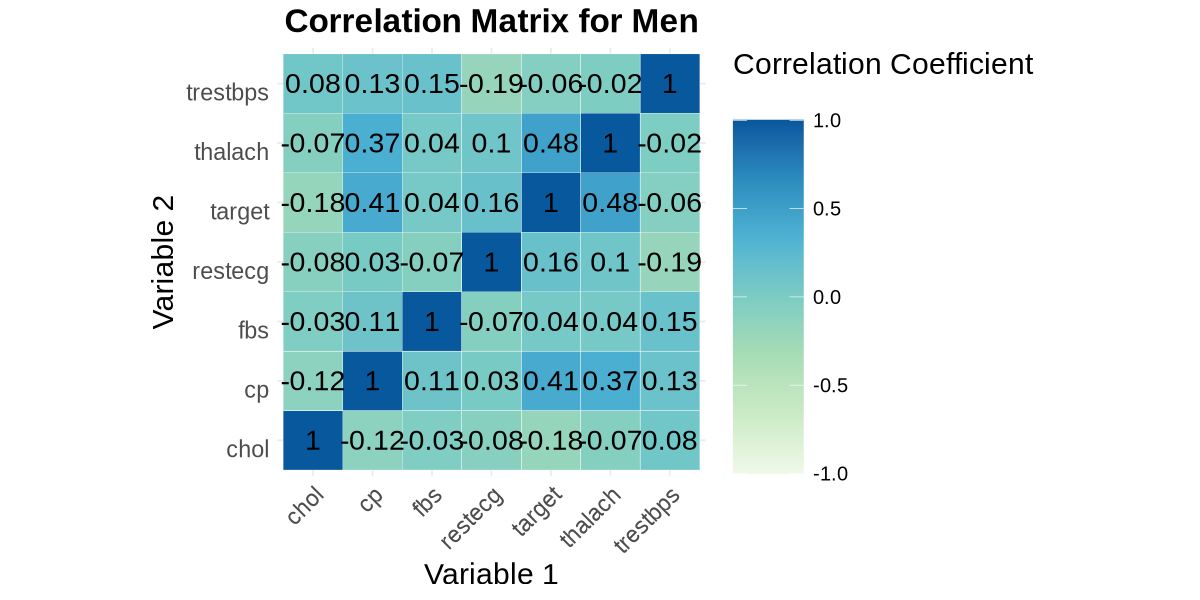

In [5]:
# Main developer: Tarvin
options(repr.plot.width = 10, repr.plot.height = 5) 

men_corr_matrix <- 
   men_data %>%
   cor() %>%
   as_tibble(rownames = 'var1') %>%
   pivot_longer(-var1, names_to = "var2", values_to = "corr")

plot_men_corr_matrix <- 
  men_corr_matrix %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
      palette = "GnBu",
      direction = 1, 
      limits = c(-1,1)
    ) +
    labs(x = "Variable 1", y = "Variable 2") +
    ggtitle("Correlation Matrix for Men") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm"),
        axis.title.x = element_text(size = 18),
        axis.title.y = element_text(size = 18),
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5)
    ) +
    coord_fixed() +
   geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)

plot_men_corr_matrix

For the correlation matrix for men:
- Moderate positive correlation (0.48) between maximum heart rate achieved (thalach)/ Chest pain type (cp) (0.41) and the presence of heart disease (target), suggesting higher heart rates are associated with heart disease.
- Cholesterol (chol) has very weak correlations with most variables, indicating it may not be a strong predictor for heart disease in this dataset for men.

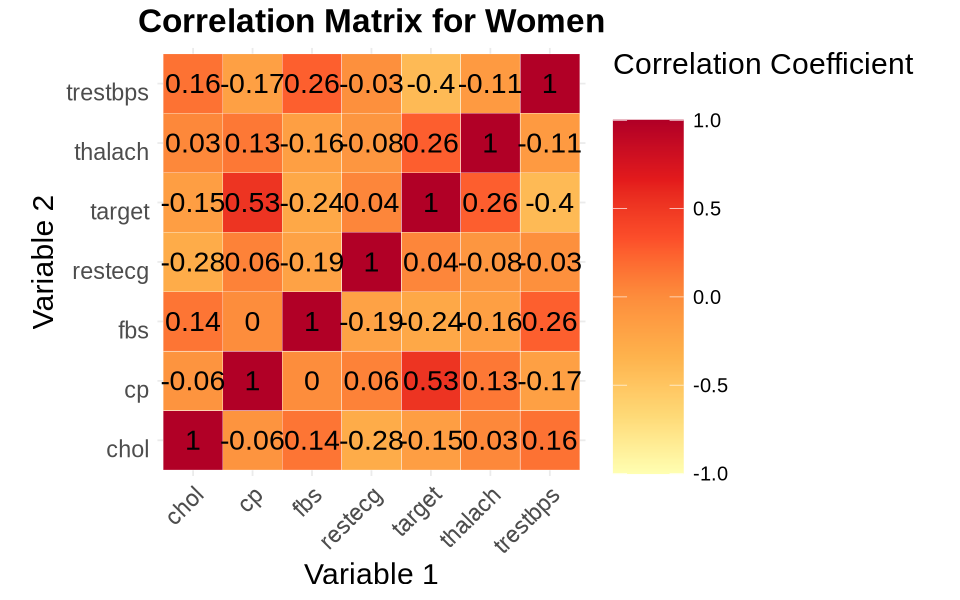

In [6]:
# Main developer: Tarvin
options(repr.plot.width = 8, repr.plot.height = 5) 

women_corr_matrix <- 
   women_data %>%
   cor() %>%
   as_tibble(rownames = 'var1') %>%
   pivot_longer(-var1, names_to = "var2", values_to = "corr")

plot_women_corr_matrix <- 
  women_corr_matrix %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
      palette = "YlOrRd",
      direction = 1, 
      limits = c(-1,1)
    ) +
    labs(x = "Variable 1", y = "Variable 2") +
    ggtitle("Correlation Matrix for Women") +
    theme_minimal() +
    theme(
        axis.text.x = element_text(angle = 45, vjust = 1, size = 14, hjust = 1),
        axis.text.y = element_text(vjust = 1, size = 14, hjust = 1),
        legend.title = element_text(size = 18),
        legend.text = element_text(size = 12),
        legend.key.size = unit(1.5, "cm"),
        axis.title.x = element_text(size = 18), 
        axis.title.y = element_text(size = 18),
        plot.title = element_text(size = 20, face = "bold", hjust = 0.5)
    ) +
    coord_fixed() +
   geom_text(aes(var1, var2, label = round(corr, 2)), color = "black", size = 6)

plot_women_corr_matrix

For the correlation matric with women:
- There is a moderate positive correlation (0.53) between chest pain type (cp) and the presence of heart disease (target), indicating a stronger relationship between chest pain and heart disease in women compared to men.
- The resting blood pressure (trestbps) and the target variable have a moderate negative correlation (-0.40), suggesting higher resting blood pressure might be associated with lower likelihood of heart disease in women.
- Fasting blood sugar (fbs) shows very weak correlations with most other variables, implying it may not be a significant predictor of heart disease for women in this dataset.

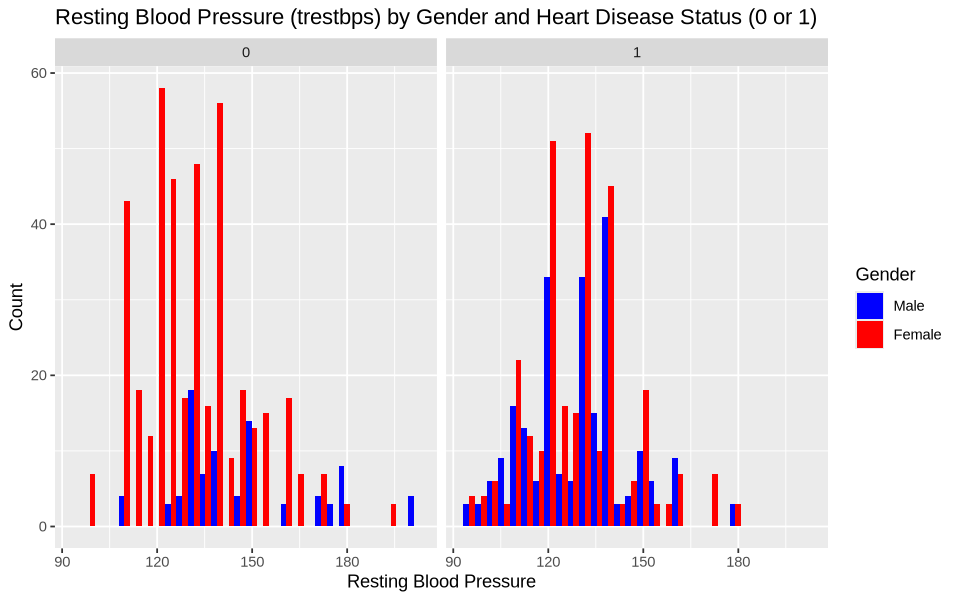

In [7]:
# Main developer: Tarvin
trestbps_histogram <- ggplot(heart_clean, aes(x = trestbps, fill = as.factor(sex))) +
  geom_histogram(position = "dodge", bins = 30) +
  facet_wrap(~target) +
  labs(title = "Resting Blood Pressure (trestbps) by Gender and Heart Disease Status (0 or 1)",
       x = "Resting Blood Pressure", y = "Count", fill = "Gender") +
  scale_fill_manual(values = c("blue", "red"), labels = c("Male", "Female"))
trestbps_histogram

- For individuals without heart disease (target = 0), the plot shows that females (red) generally have a higher count in the resting blood pressure range of 120-140 mmHg compared to males.
- For individuals with heart disease (target = 1), females again have higher counts in the 120-140 mmHg range. Males (blue) show some relative increase in counts at higher blood pressure ranges, though females dominate the overall counts.

Clearly, females seem to have a higher resting blood pressure than men regardless of the presence or absence of Heart Disease. But, for males, resting blood pressure is significantly higher in the presence of heart disease. 

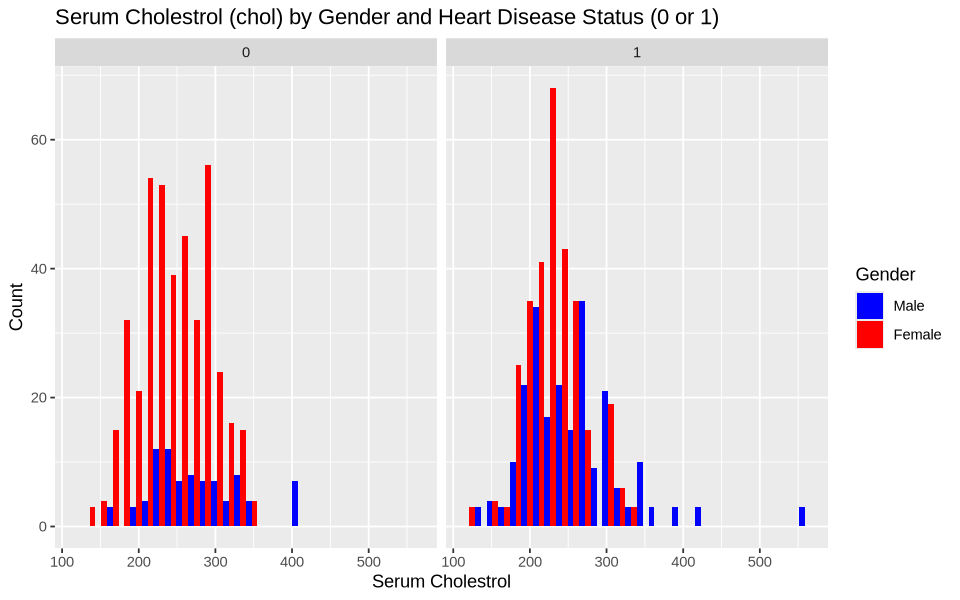

In [8]:
# Main developer: Tarvin
chol_histogram <- ggplot(heart_clean, aes(x = chol, fill = as.factor(sex))) +
  geom_histogram(position = "dodge", bins = 30) +
  facet_wrap(~target) +
  labs(title = "Serum Cholestrol (chol) by Gender and Heart Disease Status (0 or 1)",
       x = "Serum Cholestrol", y = "Count", fill = "Gender") +
  scale_fill_manual(values = c("blue", "red"), labels = c("Male", "Female"))
chol_histogram

- Individuals without heart disease (target = 0): Females (red) have significantly higher counts across serum cholesterol levels, compared to males (blue).
- Individuals with heart disease (target = 1): Females show a higher count in the 200-250 mg/dL range, indicating that cholesterol levels in this range are more prevalent among women with heart disease.

Clearly, augmented cholestrol levels are more common in females regardless of heart disease status. But, for males, serum cholestrol levels are significantly higher when heart disease is also present. 

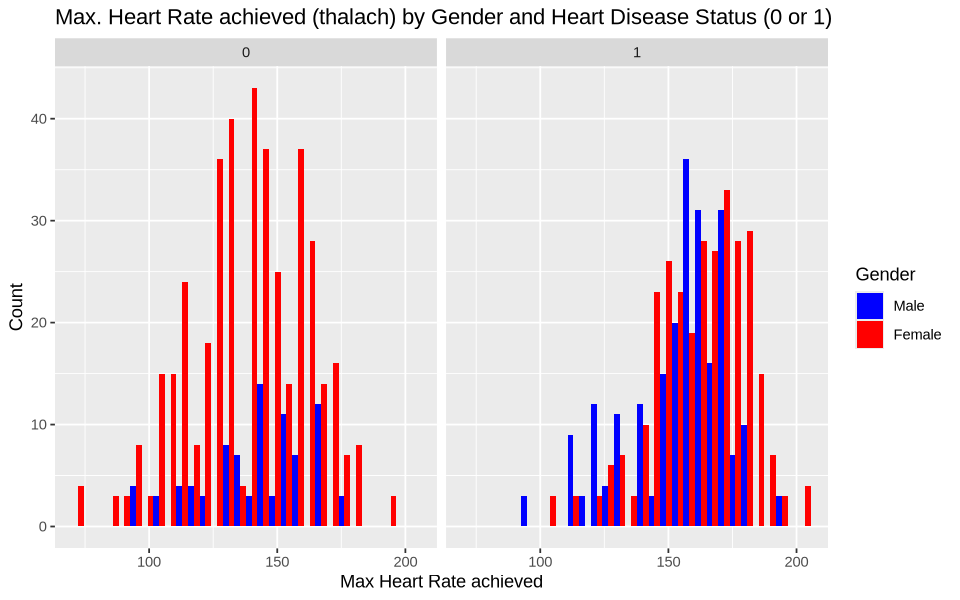

In [9]:
# Main developer: Tarvin
thalach_histogram <- ggplot(heart_clean, aes(x = thalach, fill = as.factor(sex))) +
  geom_histogram(position = "dodge", bins = 30) +
  facet_wrap(~target) +
  labs(title = "Max. Heart Rate achieved (thalach) by Gender and Heart Disease Status (0 or 1)",
       x = "Max Heart Rate achieved", y = "Count", fill = "Gender") +
  scale_fill_manual(values = c("blue", "red"), labels = c("Male", "Female"))
thalach_histogram

- Individuals without heart disease (target = 0): Females (red) tend to have a higher count in the 130-160 range of maximum heart rate compared to males (blue), suggesting that, among those without heart disease, women tend to reach higher maximum heart rates.
- Individuals with heart disease (target = 1): Males (blue) have similar or slightly higher counts compared to females in the 140-160 range of maximum heart rate. This indicates that men with heart disease are also capable of achieving relatively high heart rates, similar to women.

In [10]:
# Main developer: Tarvin
heart_disease_present <- subset(heart_clean, target == 0)
heart_disease_absent <- subset(heart_clean, target == 1)

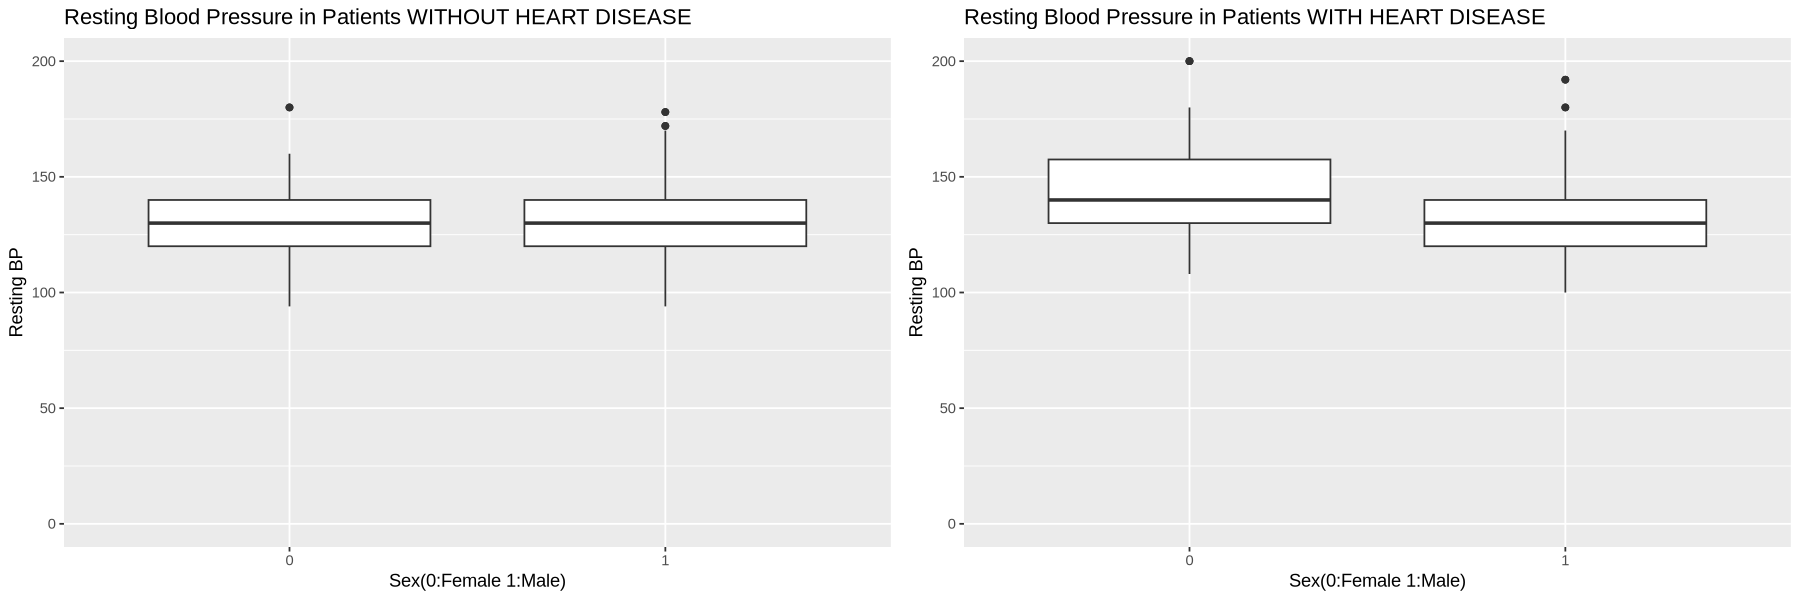

In [11]:
# Main developer: Tarvin
options(repr.plot.width = 15, repr.plot.height = 5) 

trestbps_box0 <- ggplot(heart_disease_absent, aes(x = as.factor(sex), y = trestbps)) +
  geom_boxplot() +
  labs(x = "Sex(0:Female 1:Male)", y = "Resting BP", title = "Resting Blood Pressure in Patients WITHOUT HEART DISEASE") +
    ylim(0, 200)

trestbps_box1 <- ggplot(heart_disease_present, aes(x = as.factor(sex), y = trestbps)) +
  geom_boxplot() +
  labs(x = "Sex(0:Female 1:Male)", y = "Resting BP", title = "Resting Blood Pressure in Patients WITH HEART DISEASE") +
ylim(0, 200)

plot_grid(trestbps_box0, trestbps_box1)

Based on the boxplots, we see that in male patients with heart disease, resting blood pressure increases on average, while for female patients, resting blood pressure stays the same on average, serving as an important indicator for heart disease.

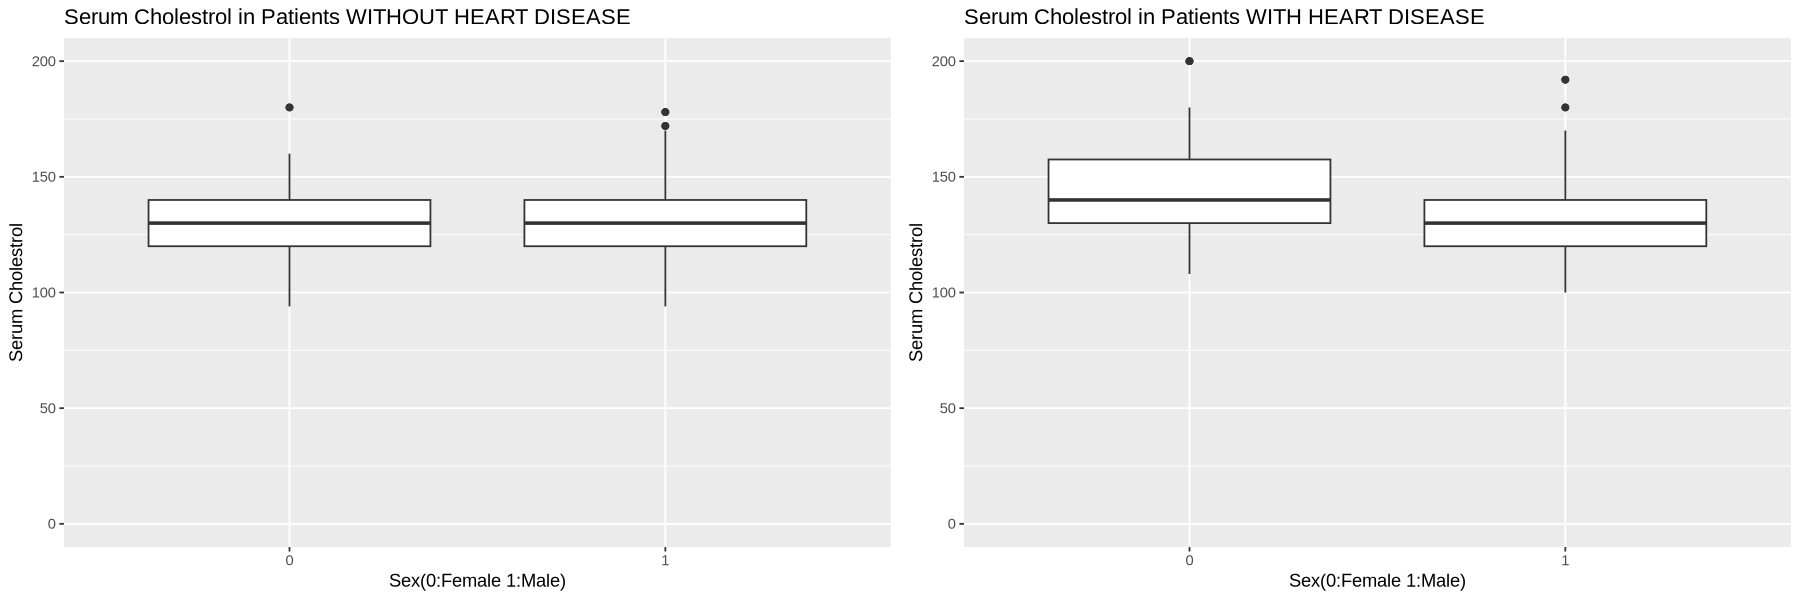

In [12]:
# Main developer: Tarvin
options(repr.plot.width = 15, repr.plot.height = 5) 

chol_box0 <- ggplot(heart_disease_absent, aes(x = as.factor(sex), y = trestbps)) +
  geom_boxplot() +
  labs(x = "Sex(0:Female 1:Male)", y = "Serum Cholestrol", title = "Serum Cholestrol in Patients WITHOUT HEART DISEASE") +
    ylim(0, 200)

chol_box1 <- ggplot(heart_disease_present, aes(x = as.factor(sex), y = trestbps)) +
  geom_boxplot() +
  labs(x = "Sex(0:Female 1:Male)", y = "Serum Cholestrol", title = "Serum Cholestrol in Patients WITH HEART DISEASE") +
   ylim(0, 200)
plot_grid(chol_box0, chol_box1)

Based on the boxplots, male patients with heart disease have significantly higher serum cholestorol versus femal patients that have about the same serum cholestrol even with heart disease. 

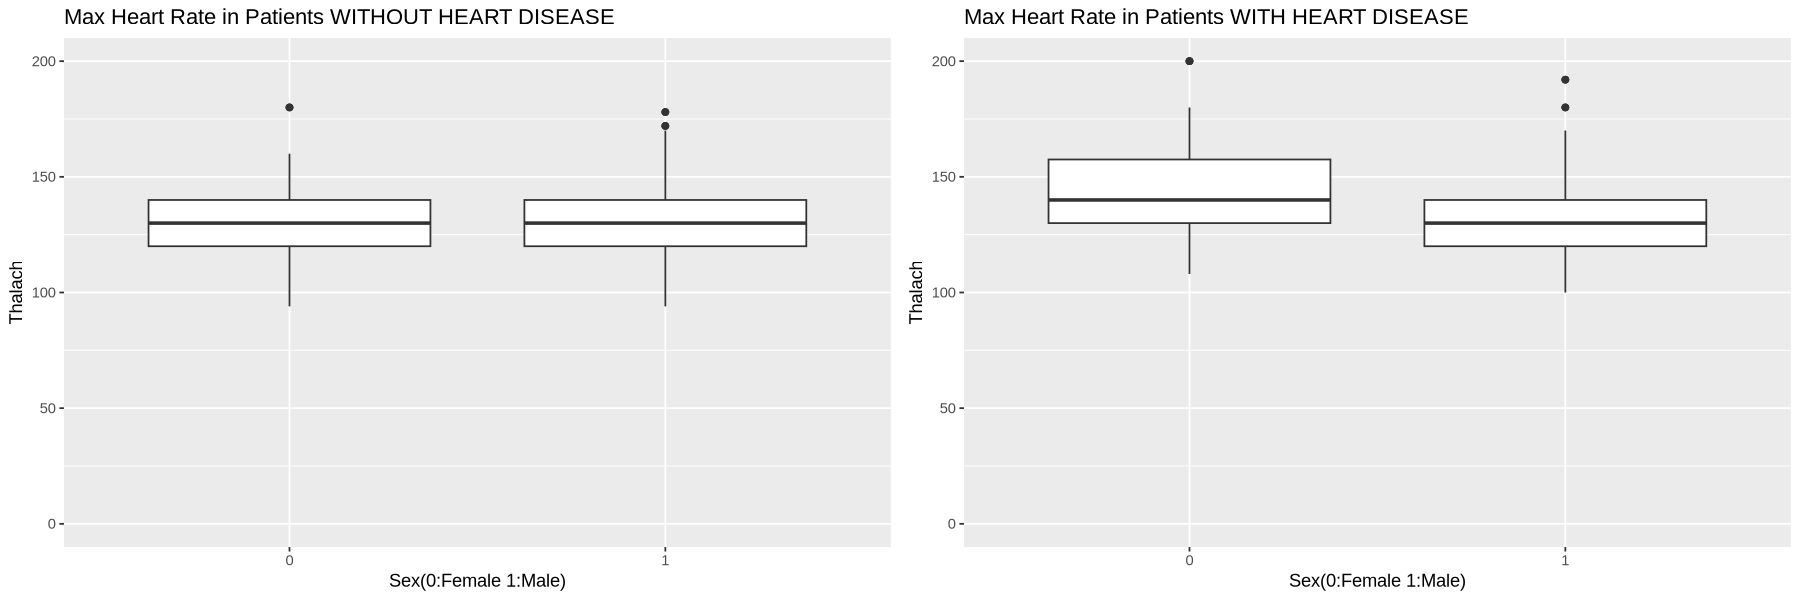

In [13]:
# Main developer: Tarvin
options(repr.plot.width = 15, repr.plot.height = 5) 

thalach_box0 <- ggplot(heart_disease_absent, aes(x = as.factor(sex), y = trestbps)) +
  geom_boxplot() +
  labs(x = "Sex(0:Female 1:Male)", y = "Thalach", title = "Max Heart Rate in Patients WITHOUT HEART DISEASE") +
  ylim(0,200)
thalach_box1 <- ggplot(heart_disease_present, aes(x = as.factor(sex), y = trestbps)) +
  geom_boxplot() +
  labs(x = "Sex(0:Female 1:Male)", y = "Thalach", title = "Max Heart Rate in Patients WITH HEART DISEASE") +
    ylim(0,200)
    
plot_grid(thalach_box0, thalach_box1)

Again, following the same trend, male patients have significantly higher maximum heart reate achieved when they also have heart disease, versus femal patients who follow the same trend with or without heart disease. 

### 4. Methods

Main author: Kevin

#### Model Building and Evaluation

We used logistic regression models to predict the presence of heart disease, one for men and one for women. Logistic regression was chosen because it is well-suited for binary classification tasks, allowing us to interpret the relationship between covariates and the target variable. The logistic regression models were fitted using the generalized linear model (GLM) function with a binomial family.

The model building process involved several key steps:

1. **Model Fitting:** We fitted logistic regression models on the training data for both men and women. The GLM function was used with the binomial family to perform logistic regression, which models the log-odds of the target variable as a linear combination of the predictor variables. This allowed us to estimate the effect of each feature on the likelihood of heart disease.

2. **Feature Importance and Coefficients:** After fitting the models, we examined the estimated coefficients to determine the importance of each feature. The coefficients represent the change in the log-odds of the target variable for a one-unit increase in the predictor variable, holding all other variables constant. We also calculated p-values for each coefficient to assess their statistical significance. Features with p-values less than 0.05 were considered significant contributors to the model, providing insight into which variables were most strongly associated with heart disease in each group.

3. **Prediction and Classification:** We used the fitted models to predict the probability of heart disease for the test data. A threshold of 0.5 was applied to classify patients as having or not having heart disease. This threshold was chosen based on the balance between sensitivity and specificity.
   
4. **Model Evaluation:** To evaluate model performance, we constructed confusion matrices for both the men's and women's models. The confusion matrix provides a summary of prediction results, showing the number of true positives, true negatives, false positives, and false negatives. Finally, from this, we calculated accuracy and reviewed our results.

### 5. Computation (Building Model)
Main author: Faraz

First, we can fit the logistic regression models on our data, building two separate models for `men_data` and `women_data`. 

In [14]:
# Main developer: Faraz
men_model <- glm(
    target ~ ., 
    data = men_data, 
    family = binomial
)

women_model <- glm(
    target ~ ., 
    data = women_data, 
    family = binomial
)

Using `ifelse()` with a threshold of $0.5$, we can convert our class predictions into a binary response, making it easier to compare them with the target.

In [15]:
# Main developer: Faraz
men_predictions <- predict(men_model, type = "response")
men_predicted_classes <- ifelse(men_predictions > 0.5, 1, 0)

women_predictions <- predict(women_model, type = "response")
women_predicted_classes <- ifelse(women_predictions > 0.5, 1, 0)

Then, we can build confusion matrices, and output the resulting accuracies.

In [16]:
# Main developer: Faraz
men_conf_matrix <- confusionMatrix(
    factor(men_predicted_classes), 
    factor(men_data$target)
)

women_conf_matrix <- confusionMatrix(
    factor(women_predicted_classes), 
    factor(women_data$target)
)

In [17]:
# Main developer: Faraz
men_accuracy <- men_conf_matrix$overall['Accuracy']
women_accuracy <- women_conf_matrix$overall['Accuracy']

men_accuracy
women_accuracy

Accuracy 
0.772791

Accuracy 
   0.875

As the output above shows, `men_accuracy` is equal to approximately $77.28\%$ and `women_accuracy` is equal to $87.5\%$.

Finally, let's visualize the confusion matrices.

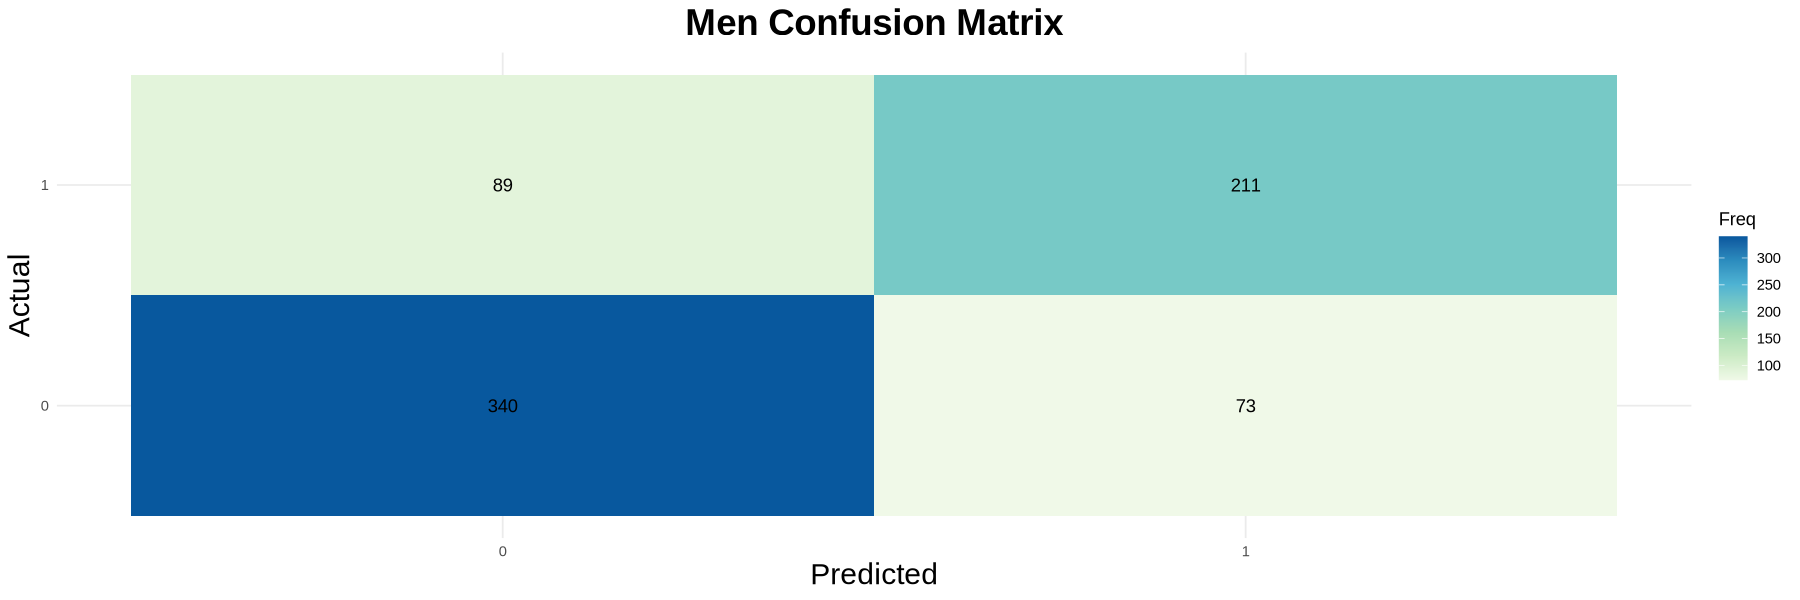

In [18]:
# Main developer: Faraz
men_conf_matrix_df <- as.data.frame(as.table(men_conf_matrix$table))=
ggplot(men_conf_matrix_df, aes(x = Prediction, y = Reference, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), color = "black") +
    scale_fill_distiller(palette = "GnBu", direction = 1) +
    labs(x = "Predicted", y = "Actual", title = "Men Confusion Matrix") +
    theme_minimal() +
    theme(    
        axis.title.x = element_text(size = 18), 
        axis.title.y = element_text(size = 18),
        plot.title = element_text(size = 22, face = "bold", hjust = 0.5)
    )

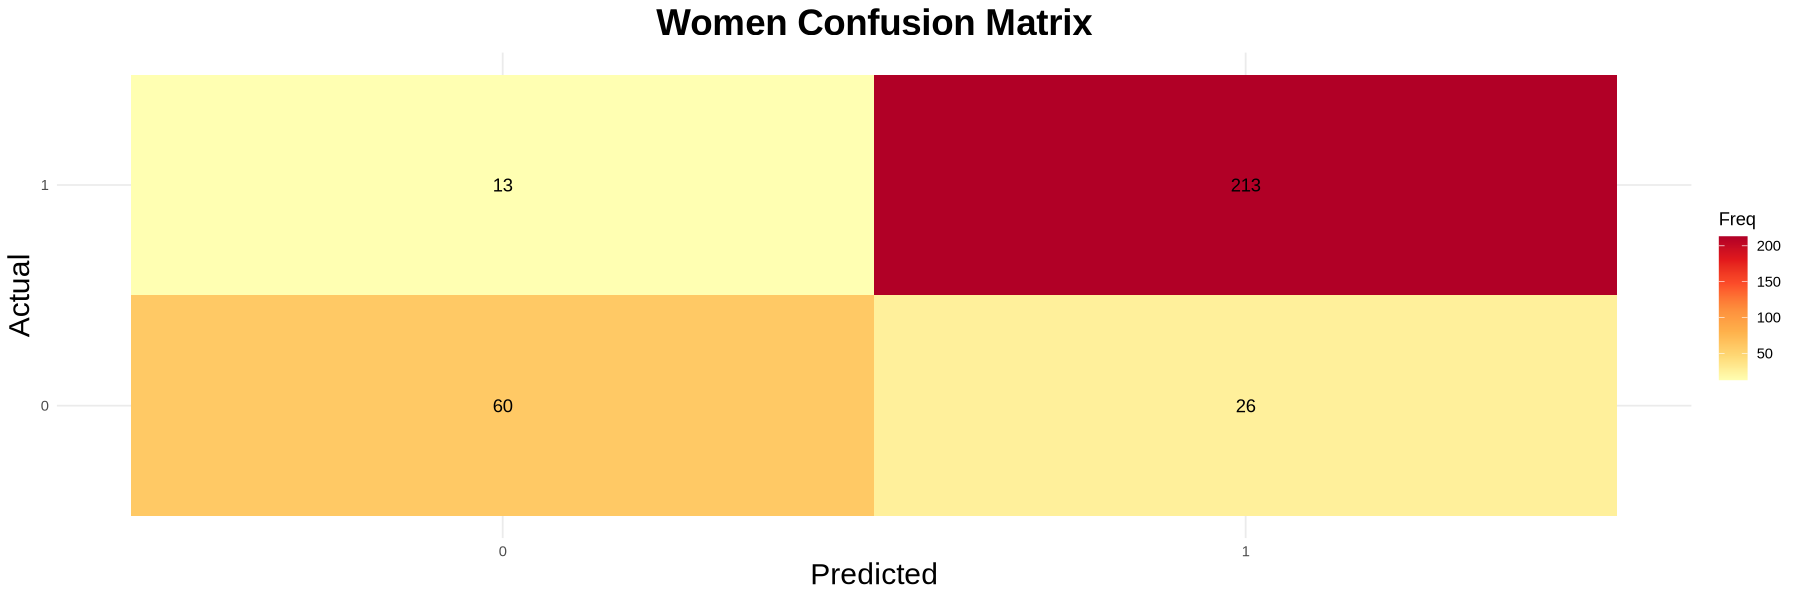

In [19]:
# Main developer: Faraz
women_conf_matrix_df <- as.data.frame(as.table(women_conf_matrix$table))
ggplot(women_conf_matrix_df, aes(x = Prediction, y = Reference, fill = Freq)) +
    geom_tile() +
    geom_text(aes(label = Freq), color = "black") +
    scale_fill_distiller(palette = "YlOrRd", direction = 1) +
    labs(x = "Predicted", y = "Actual", title = "Women Confusion Matrix") +
    theme_minimal() +
    theme(    
        axis.title.x = element_text(size = 18), 
        axis.title.y = element_text(size = 18),
        plot.title = element_text(size = 22, face = "bold", hjust = 0.5)
    )

As seen in the confusion matrices above:
- Our model correctly predicted 211 men to have heart disease and 340 men to not have heart disease, while incorrectly classifying 73 false positives and 89 false negatives.
- Our model correctly predicted 213 women to have heart disease and 60 women to not have heart disease, while incorrectly classifying 26 false positives and 13 false negatives.

### 6. Discussion
Main author: Grace
#### Summary  
The logistic regression models for predicting heart disease showed differing performances between men and women. The accuracy for the men's model was 0.773, while the women's model achieved a higher accuracy of 0.875. The confusion matrices revealed that the men's model struggled with a high number of false negatives (89) and false positives (73), whereas the women's model had relatively fewer false negatives (13) and false positives (26). These results suggest that the predictors are more effective in identifying heart disease in women than in men. This could indicate gender-specific patterns in how lifestyle factors influence heart disease risk.

#### Expected Results vs. Observed Results
**For men:**
- **Expected:** Given that predictors like maximum heart rate, chest pain type, and cholesterol levels are clinically associated with heart disease, we anticipated a high level of accuracy for both genders.  
- **Observed:** However, the men's model had a high number of false negatives (89), meaning it failed to identify many men with heart disease. Additionally, it showed 73 false positives, indicating a tendency to overestimate the presence of heart disease. This suggests that the predictors used may not fully capture the risk factors or patterns specific to men. The correlation matrix supports this observation--- the relationship between chest pain type and heart disease in men (correlation: 0.11) is much weaker than in women (correlation: 0.53).

**For women:**
- **Expected:** Given that chest pain type had the strongest correlation with heart disease in women (0.53), we expected it to significantly improve in prediction accuracy. We also expect a reasonable number of false negatives and false positives, as no model can perfectly predict results.  
- **Observed:** The women's model performed better than expected, with fewer false negatives (13) and false positives (26). This high accuracy (0.875) reflects the effectiveness of the model in capturing the relationship between the predictors and the target variable for women.

#### Improvement
The accuracy value computed from the models are 0.773 for men and 0.875 for women, which men's model has a relatively lower accuracy than the women's model. To improve our model, we can create interaction terms, such as the interactive term of chest pain type × maximum heart rate, to capture combined effects of predictors that may be missed by individual features. In addition, we can use techniques like Lasso or Ridge regularization to identify the most important predictors, whihc potentially improving model interpretability and performance.

#### Future Questions/Research
This study provides an insight for investigating gender-specific differences in heart disease predictors. Future research could explore whether other biological or environmental factors contribute to these differences. Additionally, longitudinal studies could evaluate how changes in lifestyle factors over time impact heart disease risk for men and women. This research can also generate personalized prediction models that combine genetic and behavioral data to further optimize the prevention and diagnosis of heart disease.

### 7. References

Chaitrali, S., & Apte, S. (2016). Heart Disease Prediction using Machine Learning and Data Mining Technique. International Journal of Computer Applications, 150(9), 39–44.

Detrano, R. et al. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. The American Journal of Cardiology, 64(5), 304–310.

Janosi, A., Steinbrunn, W., Pfisterer, M., & Detrano, R. (1989). Heart Disease [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C52P4X.